# Praktikum 2: Korrelationsanalyse

## Aufgabe: Korrelationsanalyse der YouTube Daten

- Nehmt die YouTube Daten aus dem 1. Praktikum
- Nutzt die bereinigten Daten aus Aufgabe 1 und exportiert sie als `parquet`-Datei. Tipp: nutzt die Funktion `to_parquet()`
- Sucht euch 2 Merkmale aus, die ihr auf Korrelation testen wollt
- Visualisiert die beiden Merkmale mit einem Scatter-Plot. Nutzt dafür `seaborn`
- Führt die Korrelationsanalyse mit dem passenden Algorithmus (Korrelationskoeffizienten) durch
- Nutzt dafür die Pandas-funktion `corr()`

- Interpretiert das Ergebnis

- Nehmt die YouTube Daten aus dem 1. Praktikum
- Nutzt die bereinigten Daten aus Aufgabe 1 und exportiert sie als `parquet`-Datei. Tipp: nutzt die Funktion `to_parquet()`

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# Daten mit Pandas einlesen
youtube_data = pd.read_parquet('youtube_data.parquet')
# Anzeigen der ersten 5 Zeilen des DataFrames
youtube_data.head()

,published_at,channel,title,duration,caption,licensed_content,projection,trend_time_hours,weekday,hours_until_trend,...,likes_growth/hour,first_rank,best_rank,views_growth,views_growth/hour,views_cleaned,likes_cleaned,dislikes_cleaned,comments_cleaned,category_name
0,2021-04-04 11:14:13+00:00,Dagi Bee,Ich habe mir 4 Tattoos gestochen ( Po & Hals 😳...,1062,False,True,rectangular,0.477778,0,33.255833,...,303.488372,1,1,6757,14142.558140,382556,16675.0,777.0,436.0,Howto & Style
1,2021-04-04 17:00:28+00:00,Gnu,Üble GERÜCHTE über Anni und Gnu! Jetzt reichts...,889,False,True,rectangular,0.477778,0,27.485000,...,437.441860,2,2,5014,10494.418605,302078,32633.0,519.0,1564.0,Entertainment
2,2021-04-03 13:00:14+00:00,Brawl Stars,"Brawl Stars: Brawl Talk! Two New Brawlers, TON...",255,True,True,rectangular,26.125556,0,55.488889,...,709.764811,3,3,3051500,116801.343937,20797544,940030.0,11778.0,114130.0,Gaming
3,2021-04-04 18:00:19+00:00,laserluca,ICH WERDE ÜBERFALLEN,879,False,True,rectangular,0.477778,0,26.487500,...,590.232558,4,4,5282,11055.348837,427309,53118.0,590.0,9963.0,Entertainment
4,2021-04-04 11:23:07+00:00,Fynn Kliemann,Sowas wie n VLOG oderso #3 | Pic & Abfahrt,348,False,False,rectangular,0.477778,0,33.107500,...,129.767442,5,4,2160,4520.930233,174353,13596.0,81.0,283.0,Entertainment


- Sucht euch 2 Merkmale aus, die ihr auf Korrelation testen wollt:
    - `audio_language`: Sprache des Videos
    - `likes`: Anzahl der Likes (Liste)
- Visualisiert die beiden Merkmale mit einem Scatter-Plot. Nutzt dafür `seaborn`

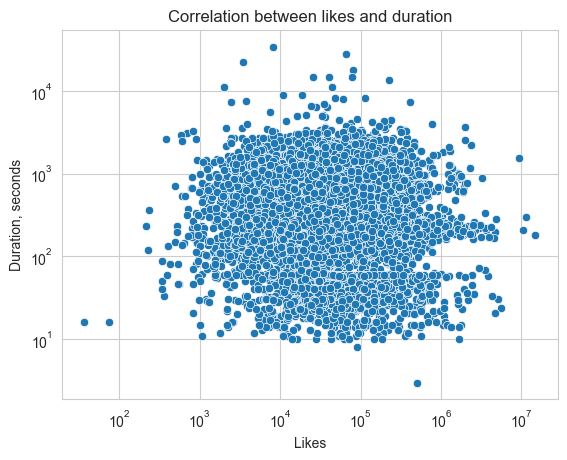

In [76]:
ax = sns.scatterplot(data=youtube_data, x='likes_cleaned', y='duration')
plt.title('Correlation between likes and duration')
# Set x-axis label
plt.xlabel('Likes')
# Set y-axis label
plt.ylabel('Duration, seconds')
# Set custom scales
ax.set_xscale('log') # A logarithmic scale is a nonlinear scale often used when analyzing a large range of quantities. Instead of increasing in equal increments, each interval is increased by a factor of the base of the logarithm. Here a base ten is used.
# ax.set_xticks([10, 100, 1000, 1e4, 1e5, 1e6, 1e7])
ax.set_yscale('log')

- Führt die Korrelationsanalyse mit dem passenden Algorithmus (Korrelationskoeffizienten) durch
    - Bravais-Pearson: ab Intervallskalenniveau (Unterscheidbarkeit, Rangordnung, Abstand zwischen den Skalenpunkten, Verhältnisse zwischen den
Skalenpunkten liefern sinnvolle Aussagen).
    - Spearman: mindestens eines der Merkmale ist ordinal skaliert.
- Nutzt dafür die Pandas-funktion `corr()`

In [77]:
# Select needed columns by name
df = youtube_data[['likes_cleaned', 'duration']]
df.corr(method='pearson')

,likes_cleaned,duration
likes_cleaned,1.000000,-0.042531
duration,-0.042531,1.000000


- Interpretiert das Ergebnis
    - Der metrische Korrelationskoeffizient nach Bravais-Pearson zeigt wie deutlich die Messwertepaare auf einer Gerade liegen und ob diese Gerade eine positive oder negative Steigung aufweist. In unserem Falle ist der Koeffizient ca. -0.04, liegt also nah an 0 (die Wertepaare formen keine Gerade). Das bedeutet kein Zusammenhang zwischen den Likes und Länge des Youtube-Videos.